## Обучение нейросети

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Преобразование данных

In [6]:
train = pd.read_csv('mnist_train.csv', header = None)
test = pd.read_csv('mnist_test.csv', header = None)

In [7]:
train.shape #1 столбец для label, все остальные (28 * 28 = 784) - код картинки

(60000, 785)

In [9]:
cols = ['label']
for i in range(784):
    cols.append('px_{}'.format(i+1))

In [11]:
test.columns = cols
train.columns = cols

,label,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,...,px_775,px_776,px_777,px_778,px_779,px_780,px_781,px_782,px_783,px_784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
image_row = train.values[666, 1:]
image_row.shape

(784,)

In [22]:
image_row.reshape(28, 28).shape

(28, 28)

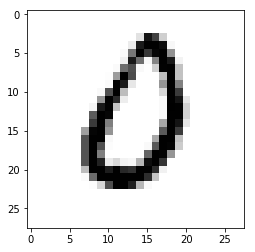

In [23]:
plt.imshow(image_row.reshape(28, 28), cmap = 'Greys')

### Обучение классификатор

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
train_data = train.values[:, 1:]
test_data = test.values[:, 1:]
train_label = train.values[:, 0]
test_label = test.values[:, 0]

In [27]:
kn_classifier = KNeighborsClassifier(n_jobs = -1)

In [28]:
kn_classifier = kn_classifier.fit(train_data, train_label)

На рисунке представлена цифра 1


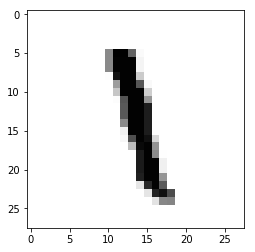

In [37]:
test_id = 700
plt.imshow(test_data[test_id, :].reshape(28, 28), cmap = 'Greys')
print('На рисунке представлена цифра {}'.format(test_label[test_id]))

In [40]:
kn_classifier.predict(test_data[test_id, :].reshape(1, 784))

array([1], dtype=int64)

### Процент ошибки 

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
kn_predictions = kn_classifier.predict(test_data)

0.9688

In [48]:
accuracy = accuracy_score(test_label, kn_predictions)

0.9688

In [49]:
print('Точность предсказания {}%'.format(accuracy*100))

Точность предсказания 96.88%
